# Question 4
## Out of the gendered words/phrases, which are the most common? 
## Count which one occurs most

In [1]:
'''
Approach:
1. Similar to counting the words that appear the most for job descriptions and job titles
2. Create a count for the gendered words in the job description
3. Create histogram or some sort of pie chart to display that
'''

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import requests
import collections
from bs4 import BeautifulSoup

masculine_themed_wording = [
    "competitive",
    "dominate",
    "leader",
    "rock star",
    "rockstar",
    "guru",
    "ninja",
    "hacker",
    "superhero",
    "prove themselves",
    "analyze",
    "determine",
    "crush it",
    "world class",
    "superior",
    "ambitious",
    "aggressive"
]

states = ['AL',
    'AK',
    'AZ',
    'AR',
    'CA',
    'CO',
    'CT',
    'DE',
    'DC',
    'FL',
    'GA',
    'HI',
    'ID',
    'IL',
    'IN',
    'IA',
    'KS',
    'KY',
    'LA',
    'ME',
    'MD',
    'MA',
    'MI',
    'MN',
    'MS',
    'MO',
    'MT',
    'NE',
    'NV',
    'NH',
    'NJ',
    'NM',
    'NY',
    'NC',
    'ND',
    'OH',
    'OK',
    'OR',
    'PA',
    'RI',
    'SC',
    'SD',
    'TN',
    'TX',
    'UT',
    'VT',
    'VA',
    'WA',
    'WV',
    'WI',
    'WY' ]

total_jobs = 22000
jobs = pd.read_csv("dice_com-job_us_sample.csv")
jobs

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7
5,https://www.dice.com/jobs/detail/SAP-FICO-Arch...,Yash Technologies,"Full Time, Permanant",We are looking for a Senior SAP FICO Architect...,Dice Id : 10111847,"Chicago, IL",SAP FICO Architect,2 weeks ago,Telecommuting not available|Travel required to...,NaN,"FICO, AR, AP, Asset Management, HAHA",e0ac9d926dda5e95162ef05adea7318c
6,https://www.dice.com/jobs/detail/Network-Engin...,Noble1,"Full Time, Direct Hire",Network Engineer Job Description A Network Eng...,Dice Id : 90884761,"Atlanta, GA",Network Engineer,1 hour ago,Telecommuting not available|Travel not required,NaN,"Cisco, DNS, HTTP, Networking, Network Engineer...",e7e326053c586bd94e59f1fd74de4a1b
7,https://www.dice.com/jobs/detail/Sr.-Web-Appli...,"Bluebeam Software, Inc.","Full Time, Full Time",Bluebeam is looking for talented sr. web devel...,Dice Id : 10110132,"Chicago, IL",Sr. Web Application Developer (Cloud Team) - C...,2 weeks ago,Telecommuting not available|Travel not required,NaN,".NET , C#, MVC, RESTful web services, HTTP, AW...",b0dadecf4c3c2beecb9c773ca11ecda4
8,https://www.dice.com/jobs/detail/Front-End-Dev...,Genesis10,"Full Time, Direct Placement",This is a fulltime position for a Javascript d...,Dice Id : gentx001,"New York, NY",Front End Developer,7 hours ago,Telecommuting not available|Travel not required,NaN,"C++, Developer, Development, JavaScript, User ...",28f5e0c1cc3314813e674f0c32b04d1b
9,https://www.dice.com/jobs/detail/Application-S...,"VanderHouwen & Associates, Inc.","C2H W2, Contract to hire",SummaryOur client is the leading provider of o...,Dice Id : vhassoc,"Seattle, WA",Application Support Engineer,7 hours ago,Telecommuting not available|Travel not required,NaN,(See Job Description),95c9127e2770172f454f3b83981eaa88


In [2]:
'''
Approach:
1. Similar to counting the words that appear the most for job descriptions and job titles
2. Create a count for the gendered words in the job description
3. Create histogram or some sort of pie chart to display that
'''

# Returns the index it's found when using str.find


# "prove themselves","analyze","determine",
# "crush it", "world class", "superior", "ambitious", "aggressive",


# Prints the job description for any job that contains "competitive" in the description
# FOR THE STRING COMPETITIVE
print("Competitive \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("competitive") > -1)
#print(type(x))
#print(x)

count1 = 0
arr = []

# Gets count of jobs that uses that specific string in job description
for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr.append(item)
        count1 += 1
#print("length of array", len(arr))
#print("count using COMPETITIVE: ", count)
print("% that uses competitive", (count1/total_jobs) * 100)

# This loop will get the POSITION of the jobs that contain the string
# when i == value contained in arr, then print the job title
# then store into data frame
for i in arr:
    print(jobs["jobtitle"].iloc[i])
    #print(0)

    
    
    
# FOR THE STRING DOMINATE
print()
print("Dominate \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("dominate") > -1)
count2 = 0
arr2 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr2.append(item)
        count2 += 1
print("% that uses dominate", (count2/total_jobs) * 100)
        
for i in arr2:
    print(jobs['jobtitle'].iloc[i])

    
# FOR THE STRING LEADER
print()
print("Leader \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("leader") > -1)
count3 = 0
arr3 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr3.append(item)
        count3 += 1
print("% that uses leader", (count3/total_jobs) * 100)
for i in arr3:
    print(jobs['jobtitle'].iloc[i])
    
# FOR THE STRING rock star
print()
print("Rock star \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("rock star") > -1)
count4 = 0
arr4 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr4.append(item)
        count4 += 1
print("% that uses rock star", (count4/total_jobs) * 100)
for i in arr4:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING rockstar
print()
print("Rockstar \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("rockstar") > -1)
count5 = 0
arr5 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr5.append(item)
        count5 += 1
print("% that uses rockstar", (count5/total_jobs) * 100)
for i in arr5:
    print(jobs['jobtitle'].iloc[i])
    
# FOR THE STRING guru
print()
print("Guru \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("guru") > -1)
count6 = 0
arr6 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr6.append(item)
        count6 += 1
print("% that uses guru", (count6/total_jobs) * 100)

for i in arr6:
    print(jobs['jobtitle'].iloc[i])
    
# FOR THE STRING ninja
print()
print("Ninja \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("ninja") > -1)
count7 = 0
arr7 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr7.append(item)
        count7 += 1

print("% that uses ninja", (count7/total_jobs) * 100)

for i in arr7:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING hacker
print()
print("Hacker \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("hacker") > -1)
count8 = 0
arr8 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr8.append(item)
        count8 += 1
print("% that uses hacker", (count8/total_jobs) * 100)
        
for i in arr8:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING superhero
print()
print("Superhero \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("superhero") > -1)
count9 = 0
arr9 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr9.append(item)
        count9 += 1
print("% that uses superhero", (count9/total_jobs) * 100)
for i in arr9:
    print(jobs['jobtitle'].iloc[i])
    

# FOR THE STRING prove themselves
print()
print("Prove themselves \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("prove themselves") > -1)
count10 = 0
arr10 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr10.append(item)
        count10 += 1
print("% that uses prove themselves", (count10/total_jobs) * 100)
for i in arr10:
    print(jobs['jobtitle'].iloc[i])


# FOR THE STRING analyze
print()
print("Analyze \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("analyze") > -1)
count11 = 0
arr11 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr11.append(item)
        count11 += 1
print("% that uses analyze", (count11/total_jobs) * 100)
for i in arr11:
    print(jobs['jobtitle'].iloc[i])

# FOR THE STRING determine
print()
print("Determine \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("determine") > -1)
count12 = 0
arr12 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr12.append(item)
        count12 += 1
print("% that uses determine", (count12/total_jobs) * 100)
for i in arr12:
    print(jobs['jobtitle'].iloc[i])
    

# FOR THE STRING crush it
print()
print("Crush it \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("crush it") > -1)
count13 = 0
arr13 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr13.append(item)
        coun13 += 1
print("% that uses crush it", (count13/total_jobs) * 100)
if count13 != 0:
    for i in arr13:
        print(jobs['jobtitle'].iloc[i])
print("count 13: ", count13)

print()
print("World Class \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("world class") > -1)
count14 = 0
arr14 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr14.append(item)
        count14 += 1
print("% that uses world class", (count14/total_jobs) * 100)
for i in arr14:
    print(jobs['jobtitle'].iloc[i])
    

print("count14: ", count14)

# FOR THE STRING superior
print()
print("Superior \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("superior") > -1)
count15 = 0
arr15 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr15.append(item)
        count15 += 1
print("% that uses superior", (count15/total_jobs) * 100)
for i in arr15:
    print(jobs['jobtitle'].iloc[i])  


print("count15: ", count15)




 # FOR THE STRING ambitious 
print()
print("Ambitious \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("ambitious") > -1)
count16 = 0
arr16 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr16.append(item)
        count16 += 1
print("% that uses ambitious", (count16/total_jobs) * 100)
for i in arr16:
    print(jobs['jobtitle'].iloc[i]) 
    
    
print("count16: ", count16)

# FOR THE STRING aggressive 
print()
print("Aggressive \n")
x = jobs["jobdescription"].where(jobs["jobdescription"].str.find("aggressive") > -1)
count17 = 0
arr17 = []

for item, frame in x.iteritems():
    if pd.notnull(frame):
        arr17.append(item)
        count17 += 1
print("% that uses aggressive", (count17/total_jobs) * 100)
# print(arr17)
for i in arr17:
    print(jobs['jobtitle'].iloc[i])

print("count17: ", count17)

Competitive 

% that uses competitive 7.122727272727272
1001 Selenium Automation testing
Jr Business Analysts
Business Systems Analyst
Account Manager
Business Development Manager
IT Project Manager (Mobile Apps)
Manager - QA, Automation, Management, Team Development, SDLC, Agile,SOA
IT Buyer
Entry Level Business Systems Analyst
Software Engineer, Hadoop
Senior Consultant w/ TOP SECRET CLEARANCE
Hybrid Mobile Developer - HTML5, CSS3, AngularJS
Insurance Consulting Leader
Senior Back End Developer - Python, Big Data Processing
Solution Architect, Master Data Management (MDM) - East
Enterprise Information Management (EIM) Principal Consultant (Remote)
Lead Android Developer - Java, Android SDK, Android
MBA Intern - Enterprise Market Strategy
Java Lead / Java Developer with spring
Senior Developer - HEAVILYFunded, Revolutionary Biotech Co! RELO
Platform Engineer - AWS, DevOps, PHP
Software Engineer - Full Stack Cloud product development
Oracle ERP Cloud Technical (Financials/SCM)
Senior F

Senior Build & Release Engineer
Senior Networking Engineer
Cognos BI Analyst/ Developer - 12384
DevOps Engineer
Automotive Account Manager & Solution Sales
DevOps Engineer
Big Machines CPQ Solutions Architect
SOC/Security Analyst
Need a Project Manager at Santa Clara, CA
Senior Manager, Software R&D
Sales Executive / Business Development Manager
Big Data Practice Director
Jr. Bio-Medical Engineer
Sr. iOS Developer
Principal Digital Product Manager
Front End Engineer
Senior Software Developer (5-10 yrs. experienced required)
Services Product Manager
Senior DevOps Engineer
Technical JavaScript Lead - Leading Hospitality SaaS Company - SF
Account Executive (Mid Market)
Mobile Project Manager Wearables
Director, Product Management
Technical Analyst
Frontend Web Developer
Senior Software Engineer
Salesforce Administrator-Architect
Talent Manager Major Accounts
Ruby Developer - 11824
AD/Exchange Administrator
Senior Digital Analytics Manager (2016-2626)
Project Manager - MANAGEMENT CONSULTIN

Senior Lead Responsive Web Designer / Architect
Network Services Architect (Automation)
SCI Security Support 4
Java Application Architect - Dallas, TX
Baan Functional Consultant
Java J2EE Front END Architect
Manager, Global IT Operations
Computer Systems Software Engineer
Sr IAM Engineer (Federation)
BaaN Developer
Technical Project Manager
Computer Systems Software Engineer
Program Manager
Consulting Senior Associate IT Risk
IT Staffing Sales - Business Development / Account Manager
Enterprise Account Executive - Dynamics 365 -Dallas/Fort Worth
Big Data Architect
Senior Java Software Engineer (Identity & Access Management (IAM/IDM))
Lead Software Engineer
Sr. Infrastructure Security Analyst
Project Manager - Global IT PMO
Apple and/or PC Support Technician
Front End Designer/Developer
Technical Architect - Continuous Delivery
Solution Architect (WebMethods)
Tier 1 Helpdesk Technician
Information Security Engineer
Technical Lead
ETL Senior Developer
Project Manager Job
Java/JEE Princip

Business/Systems Analyst
Security Architect - Palo Alto Firewalls
Workday Solution Architect
Java Lead with Camel
Corporate Delivery Business Consultant
Cloud Architect
Project Manager
Java Developer with Cloud and Spring
Enterprise Client Executive
.Net Developer
IT Business Analyst (BA) Opportunities for Entry-Level Candidates
Solutions Architect - Security
Virtual Systems Engineer - Data Center and Cloud
Big Data Architect
IS Manager (Platform Engineering)
Oracle WMS / PMO
Experience Designer
Lead Java developer
Software Engineer Lead
SAP Solutions Architect - S/4 HANA
SOA J2EE Development Analyst
QA Lead Tester - 02045
Account Executive/Sales
Technical Leader -- Senior Software Architect
Software Architect
Java Developer- In person interview must
JIRA Administrator @ Scottsdale, AZ
Sales Manager
Lead Security Network Consulting Engineer
Network Engineer
Optical Device Engineer
WEBSPHERE SYSTEMS ADMIN./TEAM LEAD
Marketing Manager
Senior Manager, Cloud Enforcement at OpenDNS
Cisco Ne

Search Engine Marketing (SEO/SEM) Specialist (20601)
Cloud Engineer (Data Storage Management)
Quantitative Modeler - PPNR
Principal Unified Communications Consultant
Delivery Center Engineer (Orlando FL, or Lewisville, TX)
Software Development Lead
Salesforce Business Systems Analyst
Cloud Infrastructure Engineer
System Architect (SSA) - Pega
Project Manager/Program Manager
Teradata developer
Pre-Sales Senior Network Engineer
Sales force Consultant
AWS Architect - Consultant
ServiceNow Architect
Sr Systems Engineer-Cloud/VMWare/Citrix
Software developer - with flight dynamics
Salesforce Developer
Senior Java Developer
Director of Product Management, Managing Expenses
Developer VB.net
Validation Engineer
Performance Engineer
Principal UI Engineer
10217, Tech Lead, Java Developer
Digital Marketing Manager
Software Architect
Oracle Financial Functional Consultant ( Full Time)
Project Manager
Senior RF Engineer
Network Engineer/Senior Network Engineer
Release Manager
DB2 DBA
Senior Linux S

% that uses rock star 0.1181818181818182
Project Manager
Senior Designer
Senior Full Stack Software Developer.P4
Enterprise Client Executive
Solutions Architect - Security
Virtual Systems Engineer - Data Center and Cloud
Technical Leader -- Senior Software Architect
Lead Security Network Consulting Engineer
Technical Leader
Software Engineer - Evolved Network OS (Linux Networking)
Virtual Systems Engineer
Software Engineer- Front End
Technical Leader/SW Manager
Enterprise Account Manager
IT Auditor - Information Security Audit
Big Data Architect/Principal Engineer
Technical Leader- Openstack
Test Automation Architect (Senior SDET)
System Engineer
Technical Leader - Software Engineering
Support Engineer Tier 1 multimedia, video streaming
Technical Email Manager
Senior Developer C#
Senior Electrical Design Engineer
Sr iOS Developer
Contract Graphic Designer

Rockstar 

% that uses rockstar 0.03181818181818182
Lead Java Developer
Sr.Android Developer
Business Intelligence Engineer
SAILPOI

Consulting - Supervisor
GIS Analyst - F2F Interview
Data Analytics
Director, Biomedical Sensor Development and Systems Integration
Oracle EBS Financials Functional Analyst
SAP Security Specialist (Locals Only)
Senior SOA Architect
Virtual Reality Calibration Engineer
Accounting Manager
Consulting - Manager - Blackline
Process innovation Manager
Sr. Web Designer Developer
JAVA Developer - Irving, TX
Information Security Architect
Senior Informatica Developer
Sr. Big Data Solution Architect
Android Mobile Tester
Consulting Risk Advisory Security & Privacy Penetration Tester
FAO Manager
Oracle developer
Technical Business Analyst - Access Management
Mobile Application Solution Architect
QA Tester
Sr. Reporting Analyst
Oracle Fusion HCM Techno-Functional Analyst
Business Systems Analyst
Oracle Developer / Analyst
Oracle SOA Developer
Business Analyst
Consulting - Manager - Blackline
Senior Cisco VOIP Engineer UCC
Information Security Analyst
ADF Developer
OpenStack Consultant
MDM Senior De

% that uses determine 5.613636363636363
Java Architect - Denver, CO - Fulltime
IT Business Analyst
Senior Product Manager
C++ Software Engineer
Lead Java Engineer
Technical Infrastructure Project Manager
Sr. Quality Assurance Test Analyst
Capacity Planning Engineer - 11350
SQL Web Application Developer
Exhaust Processor (Exhaust) 3rd Shift
Business Development Manager
System Engineer
Program Scheduler V
Oracle eBusiness Programmer (Oracle R12)
Network Administrator - Cisco UCS, VMware, Citrix, Windows
Wireless/RF Network Engineer
Natural/ADABAS Developer
Counselor- Project/Program (Admin)
Customer Service Representative
Software Engineer-Graphics Interface Development
Electrical Project Engineer
Business Intelligence Developer (IT)
OMS (Sterling OMS) Architect/Consultant
Security Engineer
Developer in Test
Fraud Investigation Analyst
Dev Ops Engineer
Sr. Java Developer (Local to MA)
Associate Director of Commercial IT Applications
Multimedia Training Developer
Enterprise Information Ma

% that uses crush it 0.0
count 13:  0

World Class 

% that uses world class 0.7181818181818181
Frontend/UI Developer
Frontend/UI Developer
Application Support / Data Analyst
Mobile iOS Developer
Systems Engineer- Managed Services
Project Manager - Data Analytics
Java Software Engineer
Android Developer
Web Developer
Internal Audit Senior Associate
DevOps/Azure Release Engineer
Director, Quality Engineering
Full Stack JavaScript (node) Developer/Architect
Sr Python Developer and Python Architect
Sr .NET Developer - Azure/MVC/WebAPI/Bootstrap
SQL Programmer/Analyst
Software Engineer
Art Director, Amazon Fashion
Software Development Engineer
Sr. Software Engineer
Software Development Engineer
Software Development Engineer
Sr. Front-End / Angular Web Developer
Sr. Software Engineer, The Huffington Post
Sr. Software Engineer, The Huffington Post
SAP HANA Instructor
Director of Product Engineering and Innovation
Sr. Software Development Engineer - (OPC/RET)
Developer ( C#, JavaScript, Java 

Enterprise Application Developer
Signal Integrity Test Engineer
Software Development Engineer - Mobile Ads
Java Developer
Freelance OpenStack Engineer
Presenter
SDET II
Technical Project Manager
Lead UI Engineer (React.js) - Top HR Software Startup
Business Intelligence Data Engineer
Full Stack Developer
Java/Scala Developer
Project Manager - Risk IT
.Net & Angular Developer
Project Manager (Mortgage Background) - Empower Loan Origination
Project Administrator/Implementation Specialist
Senior Virtualization/Cloud Engineer
Lead .NET Programmer Analyst
Lead Security Analyst
Cloud / Platform Engineer
Pre-Sales Engineer
SVP Risk Management
Operations Implementation Manager
Wireless Solutions Architect
Director of Financial Planning & Analysis
Product Software Architect
VOIP Network Engineer
Senior Web Developer
PMO Project Manager
Product Manager (Agile) - BHJOB2052_12518
Sr Wireless Engineer
Office 365 Consultant
.Net Developer - Marietta, GA
Senior Java Developer
SQL DBA
Incident Respons

Sales/Recruiters (IT Staffing)
AVP, Business Systems
Java Software Engineer
Senior ETL Developer
Senior Network Engineer
Senior Project Manager- FInancial C2H
Oracle Functional Consultant
Senior QA Analyst with Infrastructure experience
Sales Development Respresentative
Senior Project Manager- FInancial C2H
OSP Project Manager
Infrastructure Project Manager
Senior Engineer - Hadoop
Salesforce Developer
16-SOL-0823 Data Warehouse Analyst
Salesforce Developer / Lead
Salesforce Developer / Lead
Automated Test Developer
Delivery Engineer - Java, Linux
Automated Test Developer
Encompass Administrator
Service Operation Manager
PeopleSoft Absence Management Lead
.Net Web Developer
DevOps Engineer
Principal Client Technologist - Pre-Sales
Senior Security Architect
Core Java Developer/ Arcchitect
Sr. QA Analyst (w/Big Data) - 02966
Salesforce Developer
Senior Manager - Marketing
Web Application Developer
Senior Software Engineer
Java Developer , J2SE
VP of Engineering
Front- End Apps Developer/

In [27]:
complete_job_list = arr + arr2 + arr3 + arr4 + arr5 + arr6 + arr7 + arr8 + arr9 + arr10 + arr11 + arr12 + arr13 + arr14 + arr15 + arr16 + arr17

# ^^ Remove duplicates from this list by converting to a set then back to a list
complete_job_list_exclusives = list(set(complete_job_list))
print("Without duplicates")
print(complete_job_list_exclusives)
print(len(complete_job_list_exclusives))

job_title_list = []
for i in complete_job_list_exclusives:
    job_title_list.append(jobs['jobtitle'].iloc[i])

job_desc_list = []
for i in complete_job_list_exclusives:
    job_desc_list.append(jobs['jobdescription'].iloc[i])
    
job_location_list = []
for i in complete_job_list_exclusives:
    job_location_list.append(jobs['joblocation_address'].iloc[i])


# Create a dataframe that has job #, job title, job description and location
dataframe = pd.DataFrame(complete_job_list_exclusives, index = complete_job_list_exclusives, columns = ["Job Number"])
dataframe["Title"] = job_title_list
dataframe["Description"] = job_desc_list
dataframe["Location"] = job_location_list
dataframe["State"] = dataframe["Location"].apply(lambda x: pd.Series(str(x).split(", ")[-1]))

# Remove jobs that are not in US states
drop_list = []
for state in dataframe['State']:
    if state not in states:
        drop_list.append(state)
drop_list

state_count = dataframe['State'].value_counts()
print(type(state_count))
state_count = state_count.drop(labels = drop_list)
state_count = state_count.to_frame()
state_count

Without duplicates
[2, 9, 10, 11, 13, 15, 19, 20, 24, 25, 26, 27, 29, 30, 35, 38, 40, 42, 45, 46, 49, 50, 51, 52, 56, 57, 60, 63, 68, 69, 73, 76, 78, 81, 86, 88, 89, 92, 96, 98, 99, 107, 108, 109, 113, 114, 115, 116, 118, 120, 123, 125, 127, 129, 130, 132, 133, 136, 137, 138, 140, 142, 143, 144, 146, 149, 152, 162, 164, 166, 168, 169, 170, 172, 174, 177, 179, 181, 183, 185, 189, 192, 195, 201, 202, 206, 207, 209, 210, 211, 214, 215, 219, 226, 228, 229, 230, 232, 234, 235, 238, 240, 245, 247, 250, 254, 259, 260, 265, 267, 268, 270, 274, 277, 282, 287, 289, 290, 291, 293, 298, 299, 303, 306, 307, 308, 310, 312, 314, 315, 319, 320, 321, 322, 323, 326, 327, 328, 331, 332, 333, 335, 338, 339, 340, 345, 347, 349, 351, 352, 354, 355, 362, 363, 366, 368, 372, 373, 376, 378, 382, 383, 385, 387, 389, 390, 391, 396, 398, 401, 402, 403, 407, 408, 409, 411, 412, 415, 416, 419, 421, 426, 429, 433, 435, 436, 439, 443, 445, 447, 448, 449, 450, 454, 455, 457, 459, 460, 461, 462, 463, 464, 469, 470, 473

<class 'pandas.core.series.Series'>


,State
CA,1551
TX,769
NY,739
GA,718
NJ,627
WA,527
MA,519
VA,304
PA,284
CT,279


In [4]:
   
#Prints the percentages for each word
'''
    "crush it",
    "world class",
    "superior",
    "ambitious",
    "aggressive"
'''
print()
print("PERCENTAGE")
print("% that uses competitive", (count1/total_jobs) * 100)
print("% that uses dominate", (count2/total_jobs) * 100)
print("% that uses leader", (count3/total_jobs) * 100)
print("% that uses rock star", (count4/total_jobs) * 100)
print("% that uses rockstar", (count5/total_jobs) * 100)
print("% that uses guru", (count6/total_jobs) * 100)
print("% that uses ninja", (count7/total_jobs) * 100)
print("% that uses hacker", (count8/total_jobs) * 100)
print("% that uses superhero", (count9/total_jobs) * 100)
print("% that uses prove themselves", (count10/total_jobs) * 100)
print("% that uses analyze", (count11/total_jobs) * 100)
print("% that uses determine", (count12/total_jobs) * 100)
print("% that uses crush it", (count13/total_jobs) * 100)
print("% that uses world class", (count14/total_jobs) * 100)
print("% that uses superior", (count15/total_jobs) * 100)
print("% that uses ambituous", (count16/total_jobs) * 100)
print("% that uses aggressive", (count17/total_jobs) * 100)

print()
print("NUMBER OF JOBS WORD OCCURS")
print("# of jobs that uses competitive: ", count1)
print("# of jobs that uses dominate: ", count2)
print("# of jobs that uses leader: ", count3)
print("# of jobs that uses rock star: ", count4)
print("# of jobs that uses rockstar: ", count5)
print("# of jobs that uses guru: ", count6)
print("# of jobs that uses ninja: ", count7)
print("# of jobs that uses hacker: ", count8)
print("# of jobs that uses superhero: ", count9)
print("# of jobs that uses prove themselves: ", count10)
print("# of jobs that uses analyze: ", count11)
print("# of jobs that uses determine: ", count12)
print("# of jobs that uses crush it: ", count13)
print("# of jobs that uses world class: ", count14)
print("# of jobs that uses superior: ", count15)
print("# of jobs that uses ambituous: ", count16)
print("# of jobs that uses aggressive: ", count17)
 


PERCENTAGE
% that uses competitive 7.122727272727272
% that uses dominate 0.045454545454545456
% that uses leader 20.79090909090909
% that uses rock star 0.1181818181818182
% that uses rockstar 0.03181818181818182
% that uses guru 0.17272727272727273
% that uses ninja 0.03181818181818182
% that uses hacker 0.1090909090909091
% that uses superhero 0.004545454545454545
% that uses prove themselves 0.04090909090909091
% that uses analyze 9.3
% that uses determine 5.613636363636363
% that uses crush it 0.0
% that uses world class 0.7181818181818181
% that uses superior 1.7727272727272727
% that uses ambituous 0.37727272727272726
% that uses aggressive 1.0636363636363637

NUMBER OF JOBS WORD OCCURS
# of jobs that uses competitive:  1567
# of jobs that uses dominate:  10
# of jobs that uses leader:  4574
# of jobs that uses rock star:  26
# of jobs that uses rockstar:  7
# of jobs that uses guru:  38
# of jobs that uses ninja:  7
# of jobs that uses hacker:  24
# of jobs that uses superhero

# Results
## We see the breakdown of the words from the array and we can see the percentages of jobs that contain these words in job descriptions
## Using this data we can create a sort of visualization

In [26]:
arr_nums = []
arr_nums.append(count1)
arr_nums.append(count2)
arr_nums.append(count3)
arr_nums.append(count4)
arr_nums.append(count5)
arr_nums.append(count6)
arr_nums.append(count7)
arr_nums.append(count8)
arr_nums.append(count9)
arr_nums.append(count10)
arr_nums.append(count11)
arr_nums.append(count12)
arr_nums.append(count13)
arr_nums.append(count14)
arr_nums.append(count15)
arr_nums.append(count16)
arr_nums.append(count17)

print(arr_nums)
total_junk = count1 + count2 + count3 + count4 + count5 + count6 + count7 + count8 + count9 + count10 + count11 + count12+ count13+ count14+ count15+ count16+ count17
total_junk

[1567, 10, 4574, 26, 7, 38, 7, 24, 1, 9, 2046, 1235, 0, 158, 390, 83, 234]


10409

In [6]:
series_nums = pd.Series(arr_nums, index=masculine_themed_wording)
series_nums

competitive         1567
dominate              10
leader              4574
rock star             26
rockstar               7
guru                  38
ninja                  7
hacker                24
superhero              1
prove themselves       9
analyze             2046
determine           1235
crush it               0
world class          158
superior             390
ambitious             83
aggressive           234
dtype: int64

Text(0.5, 0, 'Keywords')

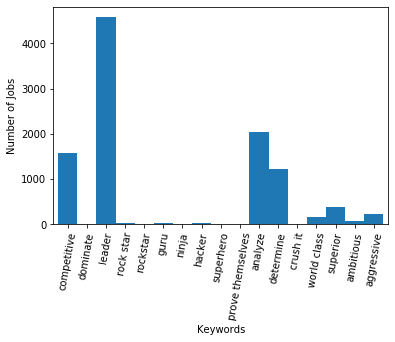

In [7]:
graph = series_nums.plot.bar(rot = 80, width = 1)
graph.set_ylabel("Number of Jobs")
graph.set_xlabel("Keywords")

In [8]:
dataframe

,Job Number,Title,Description,Location,State
2,2,Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",IL
9,9,Application Support Engineer,SummaryOur client is the leading provider of o...,"Seattle, WA",WA
10,10,OpenStack Engineer - 12185,JOB DESCRIPTION:As a senior member of the team...,"Sunnyvale, CA",CA
11,11,9001 Data Security Administrator - Unix & IAM,"Must have skills: UNIX, IAM (Identity Access M...","Highlands Ranch, CO",CO
13,13,Sales Engineer - Los Angles,Genesis10 is currently seeking a Sales Enginee...,"Los Angeles, CA",CA
15,15,Windows System Administrator,Windows Systems Administrator The Windows Syst...,"Las Vegas, NV",NV
19,19,"Java Architect - Denver, CO - Fulltime",Our client in the healthcare software industry...,"Denver, CO",CO
20,20,IT Business Analyst,Genesis10 is looking for a Business Analyst fo...,"Sandy Springs, GA",GA
24,24,USB Validation Engineer,VanderHouwen has more jobs you may like! Find...,"Austin, TX",TX
25,25,Senior Product Manager,Do you want a chance to directly improve the c...,"Seattle, WA",WA


In [41]:
# Now with the words found here, find how many times they appear by state
# Add column to the dataframe that contains the state only
# After finding by state, use that data to do word stemming and include that as a count towards the phrase
# appearance.
# Ex. leading and lead = appears 2 times.

# search through dataframe, get the jobs for state 

for state in states:
    
    count = 0
    big_word = ""
    state_dict = {}
    
    temp = dataframe.loc[dataframe['State'] == state] #works
    
    for word in masculine_themed_wording:
        index_val = word.index()
        print("index")
        word_count = temp['Description'].str.contains(word).sum() # get it to be specific for the state
        
        if word_count > count:
            count = word_count
            big_word = word
            print("state: ", state)
            print("word count: ", word_count)
            print("big word: ", big_word)


dataframe_state_index = pd.DataFrame(complete_job_list_exclusives, index = dataframe['State'], columns = ["Job Number"])
dataframe_state_index





state:  AL
word count:  5
big word:  competitive
state:  AL
word count:  11
big word:  leader
state:  AK
word count:  1
big word:  leader
state:  AZ
word count:  8
big word:  competitive
state:  AZ
word count:  23
big word:  leader
state:  AR
word count:  1
big word:  leader
state:  CA
word count:  288
big word:  competitive
state:  CA
word count:  858
big word:  leader
state:  CO
word count:  27
big word:  competitive
state:  CO
word count:  47
big word:  leader
state:  CT
word count:  42
big word:  competitive
state:  CT
word count:  158
big word:  leader
state:  DE
word count:  1
big word:  competitive
state:  DE
word count:  6
big word:  leader
state:  DC
word count:  39
big word:  competitive
state:  DC
word count:  78
big word:  leader
state:  FL
word count:  35
big word:  competitive
state:  FL
word count:  65
big word:  leader
state:  GA
word count:  151
big word:  competitive
state:  GA
word count:  451
big word:  leader
state:  HI
word count:  1
big word:  competitive
state: 

,Job Number
State,
IL,2
WA,9
CA,10
CO,11
CA,13
NV,15
CO,19
GA,20
TX,24


In [10]:
# NLTK WORKS!!!
# tutorial from https://pythonspot.com/nltk-stemming/

from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

stemmer = SnowballStemmer("english")
words = ["running", "runner", "run", 'engineer']
print(words)

ps = PorterStemmer()
for word in words:
    print(ps.stem(word))
    print(stemmer.stem(word))

['running', 'runner', 'run', 'engineer']
run
run
runner
runner
run
run
engin
engin


In [36]:
# Use NLTK and loop through the masculine words and d
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


# Use the newly found data with word stemming and find it by state here too similar to Q3
desc = jobs['jobdescription']
desc

masculine_themed_wording

# Use the masculine themed wording and the job position to 

['competitive',
 'dominate',
 'leader',
 'rock star',
 'rockstar',
 'guru',
 'ninja',
 'hacker',
 'superhero',
 'prove themselves',
 'analyze',
 'determine',
 'crush it',
 'world class',
 'superior',
 'ambitious',
 'aggressive']